- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [2]:
data1 = pd.read_csv('Pizza.csv')
data1.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84

In [3]:
df = data1.loc[:, ['brand', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']]
df.head(2)

brand   mois   prot    fat   ash  sodium  carb   cal
0     A  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  28.49  21.26  43.89  5.34    1.79  1.02  4.84

In [4]:
x = df.iloc[:,1:8].values
x

array([[27.82, 21.43, 44.87, ...,  1.77,  0.77,  4.93],
       [28.49, 21.26, 43.89, ...,  1.79,  1.02,  4.84],
       [28.35, 19.99, 45.78, ...,  1.63,  0.8 ,  4.95],
       ...,
       [44.55, 11.01, 16.03, ...,  0.64, 25.98,  2.92],
       [47.6 , 10.43, 15.18, ...,  0.56, 24.47,  2.76],
       [46.84,  9.91, 15.5 , ...,  0.57, 25.48,  2.81]])

In [5]:
y = df.iloc[:,0].values
y

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G

In [6]:
x = StandardScaler().fit_transform(x)
x

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [7]:
print(np.mean(x,axis=0)) #On vérifie que les moyennes sont bien à 0 et les écarts-types à 1
print(np.std(x,axis=0,ddof=0))

[-1.18423789e-16  1.89478063e-16 -2.36847579e-16 -5.21064673e-16
 -2.36847579e-16 -4.73695157e-17  1.89478063e-16]
[1. 1. 1. 1. 1. 1. 1.]


In [8]:
#instanciation pour l'ACP
acp = sklearnPCA(svd_solver='full')
coord = acp.fit_transform(x)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

7


In [9]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval)

[4.17178190e+00 2.29045739e+00 4.14562342e-01 9.51742273e-02
 2.76770181e-02 3.37609355e-04 9.51878034e-06]


In [10]:
#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.5959688423344786, 0.32720819826580877, 0.05922319175390227, 0.013596318186805336, 0.003953859725404389, 4.8229907838475444e-05, 1.3598257621454694e-06]


In [11]:
#On voit que 92% des donnees peuvent etre represente a l'aide des 2 premiers composants principaux.

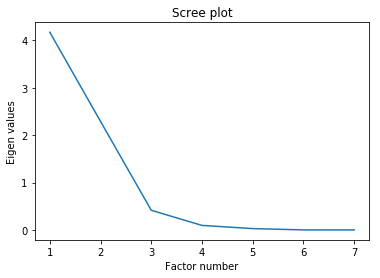

In [12]:
#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

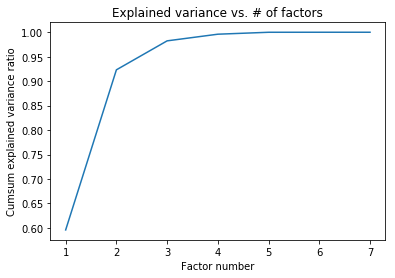

In [13]:
#cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [14]:
bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

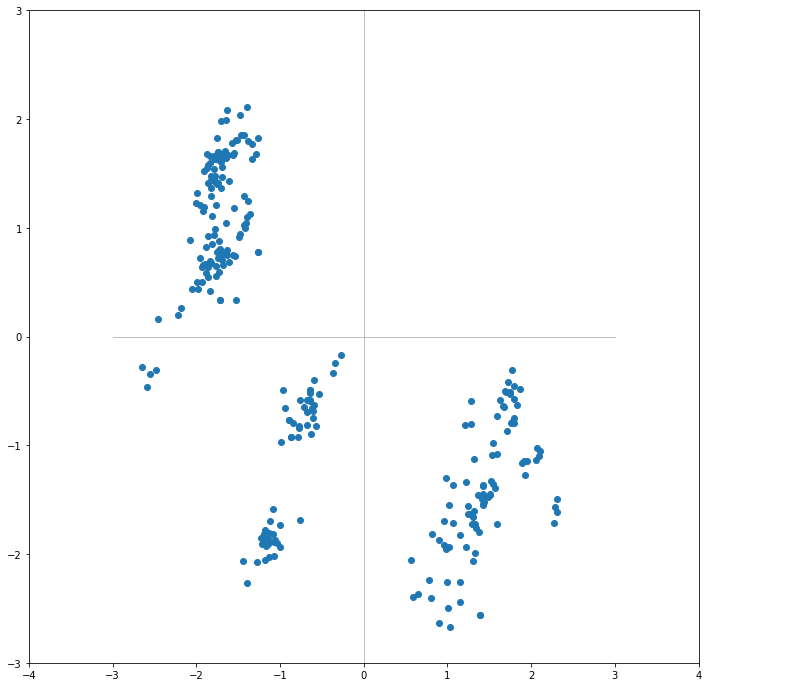

In [38]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(9):
     plt.annotate(df.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-3,3],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [40]:
#contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)
print(pd.DataFrame({'ID':df.index,'d_i':di}))

      ID        d_i
0      0  32.384714
1      1  31.816500
2      2  30.259495
3      3  25.246035
4      4  24.771480
5      5  25.077641
6      6  22.924906
7      7  28.479278
8      8  30.796560
9      9  31.246304
10    10  30.968357
11    11  31.465651
12    12  27.955068
13    13  24.905632
14    14  24.543614
15    15  29.083041
16    16  23.473236
17    17  21.307950
18    18  24.000401
19    19  26.495317
20    20  32.460159
21    21  31.061237
22    22  25.140775
23    23  22.742470
24    24  24.679827
25    25  26.355603
26    26  28.353764
27    27  25.989494
28    28  28.207181
29    29   4.866932
..   ...        ...
270  270   1.858679
271  271   1.686976
272  272   1.532336
273  273   2.193012
274  274   0.986936
275  275   1.194202
276  276   0.978920
277  277   1.946297
278  278   0.906055
279  279   1.712984
280  280   1.432553
281  281   1.144675
282  282   0.981737
283  283   1.644188
284  284   0.294823
285  285   1.510828
286  286   0.870052
287  287   0.950805


In [41]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.775166  0.221654
1      1  0.793240  0.201070
2      2  0.763141  0.236246
3      3  0.791285  0.206819
4      4  0.807292  0.188198
5      5  0.809216  0.187422
6      6  0.812318  0.184578
7      7  0.794864  0.194423
8      8  0.765258  0.233433
9      9  0.773565  0.226193
10    10  0.756748  0.241828
11    11  0.760368  0.239033
12    12  0.760472  0.237973
13    13  0.784961  0.210871
14    14  0.812924  0.185352
15    15  0.776918  0.209289
16    16  0.841775  0.142414
17    17  0.828656  0.152307
18    18  0.842563  0.148214
19    19  0.801259  0.188545
20    20  0.726831  0.271077
21    21  0.748778  0.250015
22    22  0.812044  0.185997
23    23  0.795698  0.198451
24    24  0.816775  0.165006
25    25  0.782608  0.214938
26    26  0.757397  0.240218
27    27  0.768395  0.227940
28    28  0.800002  0.197615
29    29  0.711744  0.048507
..   ...       ...       ...
270  270  0.402630  0.457151
271  271  0.475751  0.349523
272  272  0.57

In [42]:
#contributions aux axes
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(9*eigval[j])

print(pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.668607  0.348217
1      1  0.672191  0.310337
2      2  0.615038  0.346785
3      3  0.532062  0.253290
4      4  0.532621  0.226153
5      5  0.540489  0.228004
6      6  0.495986  0.205268
7      7  0.602917  0.268603
8      8  0.627692  0.348738
9      9  0.643771  0.342857
10    10  0.624173  0.363296
11    11  0.637231  0.364862
12    12  0.566213  0.322718
13    13  0.520693  0.254771
14    14  0.531403  0.220684
15    15  0.601798  0.295272
16    16  0.526266  0.162166
17    17  0.470275  0.157433
18    18  0.538588  0.172561
19    19  0.565429  0.242336
20    20  0.628377  0.426853
21    21  0.619452  0.376721
22    22  0.543743  0.226840
23    23  0.481972  0.218940
24    24  0.536884  0.197550
25    25  0.549355  0.274802
26    26  0.571966  0.330408
27    27  0.531885  0.287378
28    28  0.601017  0.270406
29    29  0.092260  0.011452
..   ...       ...       ...
270  270  0.019932  0.041219
271  271  0.021376  0.028604
272  272  0.02

In [43]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 6.47093729e-02  3.78760904e-01  4.46665915e-01  4.71889526e-01
   4.35702887e-01 -4.24913712e-01  2.44487304e-01]
 [-6.28275866e-01 -2.69706650e-01  2.34379085e-01 -1.10990417e-01
   2.01661652e-01  3.20312078e-01  5.67457559e-01]
 [-4.21668945e-01  7.46027442e-01 -1.99308714e-01  5.62726863e-02
  -4.55168874e-01  5.22365058e-02  1.13315588e-01]
 [-2.20721584e-01 -1.05931982e-02 -5.07042158e-01  5.52398549e-01
   4.46276890e-01  3.34339481e-01 -2.79263154e-01]
 [-6.47029345e-03 -3.87982788e-01  1.73367634e-01  6.70885701e-01
  -6.02614079e-01  7.43689883e-03  7.80031747e-02]
 [ 4.46449902e-01 -1.71520299e-04 -5.25402868e-01  5.88609281e-02
   3.13098518e-03 -5.08853524e-04  7.21913853e-01]
 [ 4.18569035e-01  2.76764643e-01  3.77671525e-01  5.60214003e-02
  -5.24323817e-04  7.76067911e-01  1.20598098e-02]]


In [44]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [ ]:
#corrélation des variables avec les axes
#corvar = np.zeros((5,5))
#for k in range(5):
#     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
#print(corvar)

In [ ]:
#on affiche pour les deux premiers axes
#print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

In [ ]:
#cercle des corrélations pour les deux premiers axes
#fig, axes = plt.subplots(figsize=(8,8))
#axes.set_xlim(-1,1)
#axes.set_ylim(-1,1)

# les points
#plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
#for j in range(5):
#     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
#plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
#plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
#cercle = plt.Circle((0,0),1,color='blue',fill=False)
#axes.add_artist(cercle)

#affichage
#plt.show()

In [ ]:
#cosinus carré des variables
#cos2var = corvar**2
#print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


In [ ]:
#cercle des corrélations pour l'axe 1 et 3
#fig, axes = plt.subplots(figsize=(8,8))
#axes.set_xlim(-1,1)
#axes.set_ylim(-1,1)

# les points
#plt.scatter(corvar[:,0],corvar[:,2])

#affichage des étiquettes (noms des variables)
#for j in range(5):
#     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,2]))

#ajouter les axes
#plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
#plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
#cercle = plt.Circle((0,0),1,color='blue',fill=False)
#axes.add_artist(cercle)
#affichage
#plt.show()

In [15]:
#dimension des données
print(df.shape)

#statistiques descriptives
print(df.describe())

(300, 8)
             mois        prot         fat         ash      sodium        carb  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean    40.903067   13.373567   20.229533    2.633233    0.669400   22.864767   
std      9.552987    6.434392    8.975658    1.269724    0.370358   18.029722   
min     25.000000    6.980000    4.380000    1.170000    0.250000    0.510000   
25%     30.902500    8.060000   14.770000    1.450000    0.450000    3.467500   
50%     43.300000   10.440000   17.135000    2.225000    0.490000   23.245000   
75%     49.115000   20.022500   21.435000    3.592500    0.702500   41.337500   
max     57.220000   28.480000   47.200000    5.430000    1.790000   48.640000   

              cal  
count  300.000000  
mean     3.271000  
std      0.620034  
min      2.180000  
25%      2.910000  
50%      3.215000  
75%      3.520000  
max      5.080000  


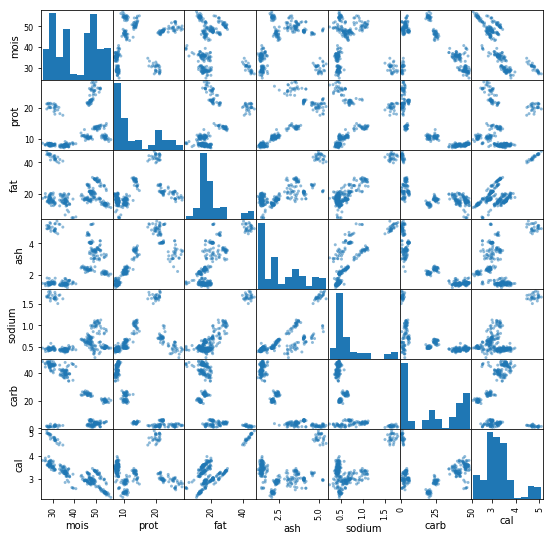

In [20]:
#graphique - croisement deux à deux des variables
scatt_mat = scatter_matrix(df,figsize=(9,9))[-1]

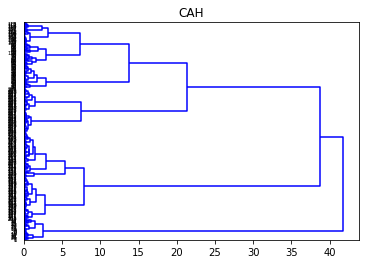

In [28]:
            #CAH
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens
Z = linkage(x,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=df.index,orientation='right',color_threshold=0)
plt.show()

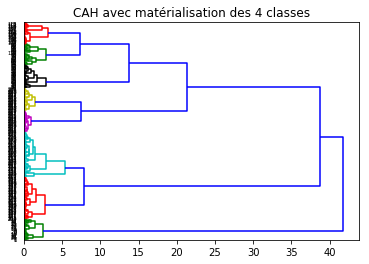

In [33]:
#matérialisation des classes (hauteur t = 10)
plt.title('CAH avec matérialisation des classes')
dendrogram(Z,labels=df.index,orientation='right',color_threshold=7)
plt.show()

In [37]:
#découpage à la hauteur t = 10 ==> identifiants de groupes obtenus
groupes_cah = fcluster(Z,t=10,criterion='distance')
print(groupes_cah)

#index triés des groupes
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pd.DataFrame(df.index[idg],groupes_cah[idg]))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]
      0
1     0
1    28
1    27
1    25
1    24
1    23
1    22
1    21
1    20
1    19
1    18
1    17
1    16
1    15
1    26
1    13
1    14
1     1
1     3
1     4
1     5
1     6
1     2
1     8
1     9
1    10
1    11
1     7
1    12
2   172
..  ...
5    89
5    60
5    61
5    62
5    63
5    64
5    65
5    66
5    67
5    68
5    69
5    70
5    71
5    72
5    73
5    74
5    7

# Partie 2

In [ ]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [17]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0

In [ ]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

In [ ]:
x = data2.loc[:, ['NBG', 'GC', 'TD', 'EPC', 'IS', 'IMC', 'DG', 'AGE']]
x

In [ ]:
y = data2.loc[:, 'RESULTAT']
y

In [ ]:
# model creation
my_model = tf.keras.models.Sequential()
# Add the layers
my_model.add(tf.keras.layers.Dense(15, activation="relu"))
my_model.add(tf.keras.layers.Dense(12, activation="relu"))
my_model.add(tf.keras.layers.Dense(10, activation="relu"))
my_model.add(tf.keras.layers.Dense(8, activation="relu"))
my_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
my_model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)

In [ ]:
my_model.fit(x, y, batch_size=16, epochs = 20)

### Utiliser ce modèle et comparer

In [18]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# La réduction du nombre de neurones par layer est ce qu'on appelle la partie encodeur du réseau.
# Elle va permettre de réduire le nombre de dimensions qui représentent les données au même titre qu'une ACP mais de manière non linéaire.
# En effet, la fonction d'activation 'relu' est linéaire pour les valeurs positives mais non linéaires pour les valeurs négatives.

# La fonction 'relu' est utile pour l'extraction des features puis la fonction 'sigmoid' permet la classification en fin de réseau.

# Les layers ne sont pas dans le bon ordre, le but est de réduire les dimensions des données.

model.fit(x, y, batch_size=16, epochs = 20)